In [ ]:
#Simulation Parameters for UAV power Consumption
import numpy as np

C= 20 # Weight of UAV
Rho = 1.225 #Air Density
U_tip=120 #Tip speed of Rotor Blade
m0= 4.03 # Mean Rotor Induced Velocity in Hover
R= 0.4 # Radius of Rotor
B= 0.503 # Disc area of UAV
e0= 0.6 # Fueslage Drag Ratio
s= 0.05 # Rotor Solidity
l= 0.1 # Incremental Correlation Factor
Delta= 0.012 # Profile Drag Coefficient of UAV
Omega= 300 # Blade Angular Velocity
m= 40 # Speed of UAV
A= 5

P0 = (Delta / 8) * Rho * s * B * Omega**3 * R**3
Pi = (1 + l) * C**(3/2) / np.sqrt(2 * Rho * B)

Pm = P0 * (1 + 3 * m**2 / U_tip**2) + \
     Pi * (np.sqrt(1 + m**4 / (4 * m0**4)) - m**2 / (2 * m0**2))**0.5 + \
     0.5 * e0 * Rho * s * A * m**3

print("Flight Power Consumption")
print(Pm)

Flight Power Consumption
5995.403844801773


Distances:
 [[84.86878531 84.77033138 84.96650778 85.45528541 86.23168888 87.28804345
  88.61433795 90.19866547]
 [41.21755681 43.33200981 45.89596016 48.83866547 52.09598189 55.61265516
  59.34259431 63.24807969]]
Channel Power Gains:
 [[0.00013884 0.00013916 0.00013852 0.00013694 0.00013448 0.00013125
  0.00012735 0.00012291]
 [0.00058862 0.00053258 0.00047473 0.00041925 0.00036846 0.00032334
  0.00028397 0.00024998]]
SNR:
 [[-1.26215108e-06 -1.26508455e-06 -1.25924947e-06 -1.24488564e-06
  -1.22256943e-06 -1.19315756e-06 -1.15770876e-06 -1.11739594e-06]
 [-5.35109701e-06 -4.84160828e-06 -4.31577103e-06 -3.81135795e-06
  -3.34964559e-06 -2.93940923e-06 -2.58151265e-06 -2.27254571e-06]]
Data Rates:
 [[[-9.10450124e-06 -9.10450124e-06 -9.10450124e-06 -9.10450124e-06
   -9.10450124e-06 -9.10450124e-06 -9.10450124e-06 -9.10450124e-06
   -9.10450124e-06 -9.10450124e-06 -9.10450124e-06 -9.10450124e-06
   -9.10450124e-06 -9.10450124e-06 -9.10450124e-06 -9.10450124e-06
   -9.10450124e-06 -9.

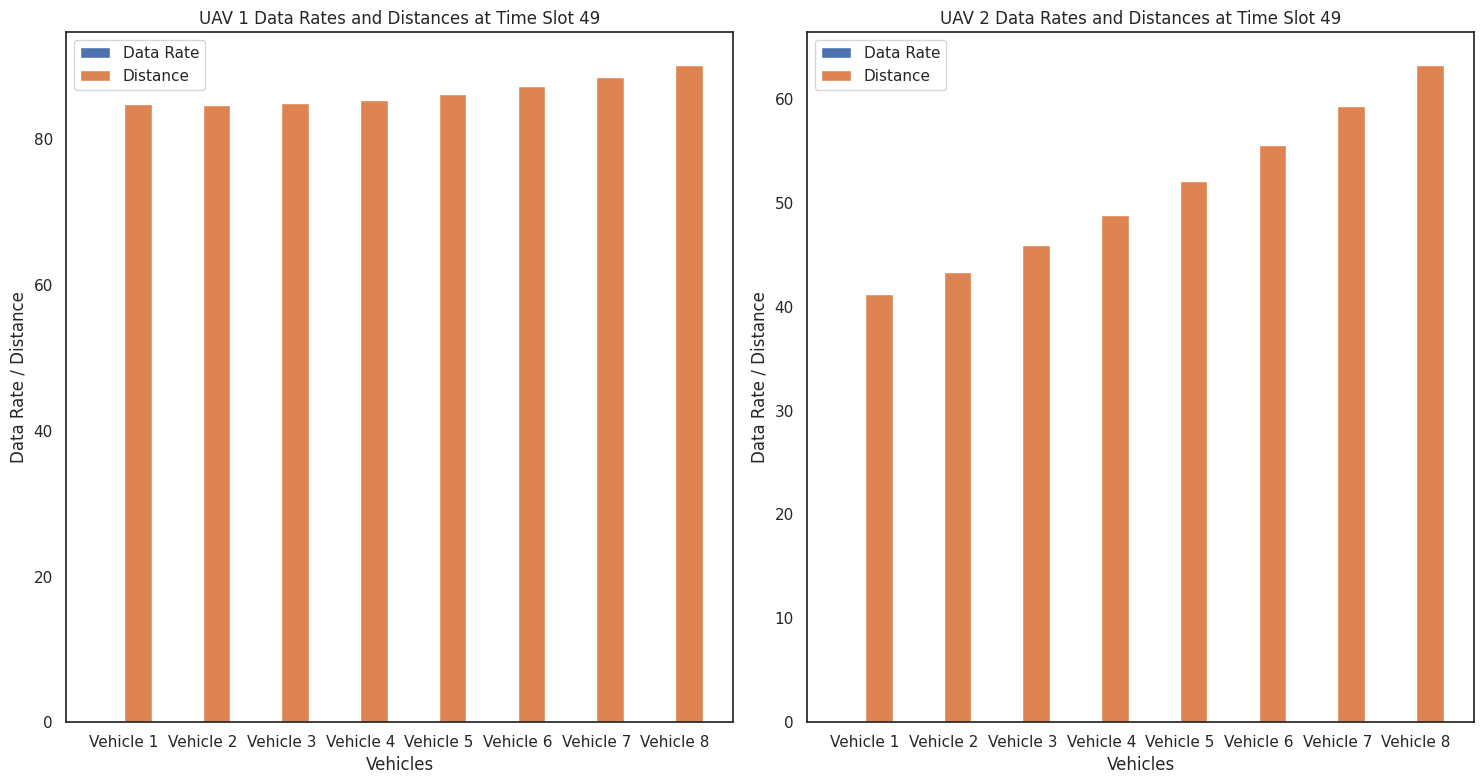

In [ ]:
#Simulation Parameters
U=2 #Number of UAVs
V= 8 # Number of Vehicles
K= 20 # Number of Subchannels
W= 5 # Bandwidth of each subchannel
T= 40 # Flight Period
Delta_t= 0.5 #Length of each time slot
R_L= 1000 # Length of Highway
R_w= 500 # width of Highway
H= 100 # Flight Altitude
S_max=40 # Maximum Speed
S_min=3 #Minimum Speed
Theta_max= 5#Maximum Acceleration
d_min=10 # Minimum Collision Distance
d0= 1 #channel gain
h_vu= -60 # channel power gain
sigma= -110 # noise power
P_max= 1 # maximum Power
N=50


#Communication Model

import numpy as np
import matplotlib.pyplot as plt


# Number of vehicles and UAVs
num_vehicles = 8
num_UAVs = 2

# Fixed distance between vehicles
fixed_distance = 5  # Assign the value for fixed distance between vehicles

# Generate initial random position for the first vehicle
q_v = np.random.rand(2) * 100  # Assuming a 2D space and scaling the position

# Generate positions for the rest of the vehicles
vehicle_positions = [q_v]
for i in range(1, num_vehicles):
    next_position = vehicle_positions[-1] + np.array([fixed_distance, 0])
    vehicle_positions.append(next_position)

# Generate random positions for UAVs
UAV_positions = [np.random.rand(2) * 100 for _ in range(num_UAVs)]

# Channel power gain constant at a reference distance of 1m
h0 = 1  # Assign a value to h0

# Noise power
sigma_squared = -110  # Assign a value to sigma^2

# Function to calculate distance between UAV and Vehicle
def calculate_distance(uav_position, vehicle_position):
    return np.linalg.norm(uav_position - vehicle_position)

# Calculate distances, channel power gains, and SNR for time slot n
n = 50  # Assign the time slot
distances = np.zeros((num_UAVs, num_vehicles))
channel_power_gains = np.zeros((num_UAVs, num_vehicles))
SNR = np.zeros((num_UAVs, num_vehicles))

for u in range(num_UAVs):
    for v in range(num_vehicles):
        distance = calculate_distance(UAV_positions[u], vehicle_positions[v])
        distances[u, v] = distance
        channel_power_gain = h0 / (distance**2)
        channel_power_gains[u, v] = channel_power_gain
        SNR[u, v] = channel_power_gain / sigma_squared


P_uv_constant = 1  # 1 watt for each UAV-vehicle pair
P_uv = np.full((num_UAVs, num_vehicles), P_uv_constant)
# Data rate calculation
data_rates = np.zeros((num_UAVs, num_vehicles, N))

for u in range(num_UAVs):
    for v in range(num_vehicles):
        for n in range(N):
            data_rates[u, v, n] = W * np.log2(1 + P_uv[u, v] * SNR[u, v])

print("Distances:\n", distances)
print("Channel Power Gains:\n", channel_power_gains)
print("SNR:\n", SNR)
print("Data Rates:\n", data_rates)





Omega:
 [[[1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1
   1 0 1 1 1 0 1 0 1 1 1 1 1 0 0]
  [0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0
   0 1 0 0 0 1 0 1 0 0 0 0 0 1 1]]

 [[0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0
   1 1 0 0 0 1 0 0 0 0 1 1 0 0 1]
  [1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 1
   0 0 1 1 1 0 1 1 1 1 0 0 1 1 0]]

 [[1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1
   1 0 0 1 0 0 0 0 1 0 1 1 0 0 0]
  [0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0
   0 1 1 0 1 1 1 1 0 1 0 0 1 1 1]]

 [[0 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1
   0 0 1 1 0 0 1 1 0 0 1 0 1 0 1]
  [1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0
   1 1 0 0 1 1 0 0 1 1 0 1 0 1 0]]

 [[0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0
   1 0 1 1 1 0 1 0 0 0 0 0 0 1 0]
  [1 1 0 1 1 0 1 0 0 

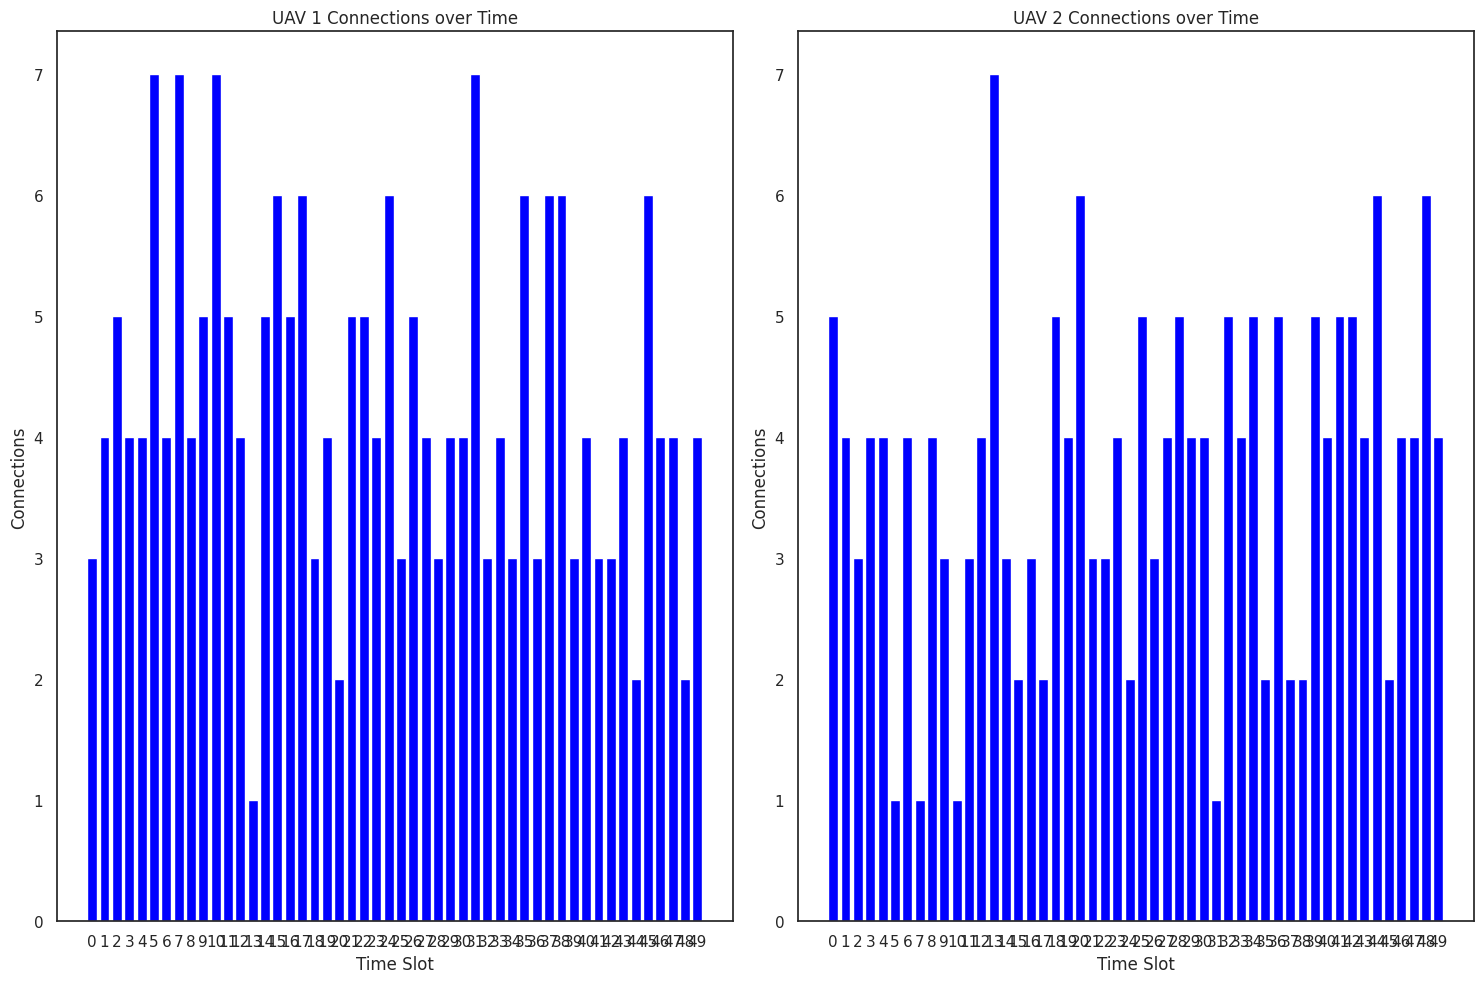

In [ ]:
import matplotlib.pyplot as plt


# Initialize omega as a 3D numpy array filled with zeros
# Dimensions are (V, U, N)
omega = np.zeros((V, U, N), dtype=int)

# Populate omega such that the sum over U for each v and n equals 1
for v in range(V):
    for n in range(N):
        # Randomly select a UAV for each vehicle and time slot
        u = np.random.choice(U)
        omega[v, u, n] = 1

# Check the condition
for v in range(V):
    for n in range(N):
        assert np.sum(omega[v, :, n]) == 1, f"Condition failed for v={v}, n={n}"

print("Omega:\n", omega)



# Initialize a figure
plt.figure(figsize=(15, 10))

# We'll create subplots for each UAV
for u in range(U):
    # Sum connections for UAV u across all vehicles for each time slot
    connections_per_time_slot = np.sum(omega[:, u, :], axis=0)  # Sum across vehicles

    # Create a subplot for each UAV
    ax = plt.subplot(1, U, u+1)

    # Generate a bar chart for each time slot
    ax.bar(np.arange(N), connections_per_time_slot, color='blue')

    ax.set_xlabel('Time Slot')
    ax.set_ylabel('Connections')
    ax.set_title(f'UAV {u+1} Connections over Time')
    ax.set_xticks(np.arange(N))  # Set x-tick labels to match time slot indices

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
# Initialize alpha as a 3D numpy array filled with zeros
# Dimensions are (V, K, N)
alpha = np.zeros((V, K, N), dtype=int)

# First, assign at least one subchannel to each vehicle for each time slot
for v in range(V):
    for n in range(N):
        k = np.random.choice(K)
        alpha[v, k, n] = 1

# Now, adjust alpha to satisfy the coupling constraint with omega
for u in range(U):
    for n in range(N):
        for k in range(K):
            # Check if the constraint is violated
            if np.sum([omega[v, u, n] * alpha[v, k, n] for v in range(V)]) > 1:
                # If violated, adjust alpha to satisfy the constraint
                violating_vehicles = [v for v in range(V) if omega[v, u, n] * alpha[v, k, n] == 1]
                for v in violating_vehicles[1:]:  # Keep the connection for the first vehicle, disconnect others
                    alpha[v, k, n] = 0

# Verification of the constraint
for u in range(U):
    for n in range(N):
        for k in range(K):
            assert np.sum([omega[v, u, n] * alpha[v, k, n] for v in range(V)]) <= 1, f"Constraint failed for u={u}, n={n}, k={k}"

print("Alpha:\n", alpha)

Alpha:
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 1]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 1 ... 1 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 1 0]]

 [[0 0 0 ... 0 1 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 1]
  [1 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 1 0]
  [1 0 0 ... 0 0 0]]]


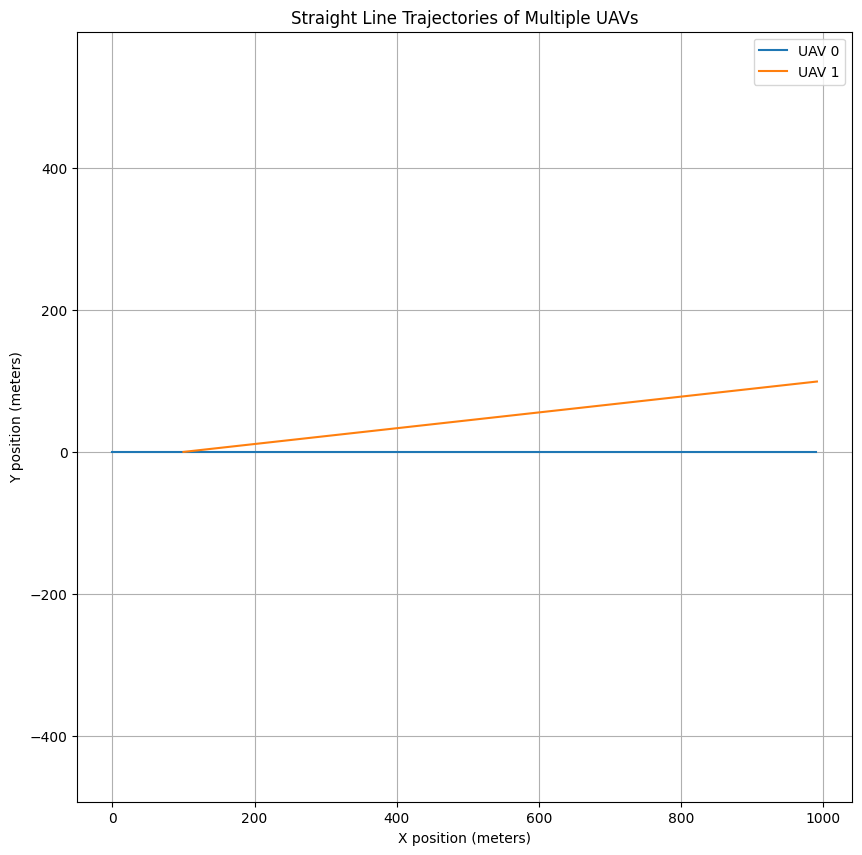

In [ ]:
import numpy as np

# Constants
N = 100  # Number of time slots
M = 2    # Number of UAVs
H = 100  # Altitude at which all UAVs fly
delta_t = 1  # Length of each time slot
V_max = 20  # Maximum velocity
d_min = 10  # Minimum safety distance

# Initial positions (x, y, H) for M UAVs
q_0 = np.array([[0, 0, H],
                [100, 0, H],
                [200, 0, H],
                [300, 0, H],
                [400, 0, H]])

# Final positions for M UAVs, just for initialization purposes
q_F = np.array([[1000, 0, H],
                [1000, 100, H],
                [1000, 200, H],
                [1000, 300, H],
                [1000, 400, H]])

# Initialize trajectories for M UAVs over N time slots
trajectories = np.zeros((M, N+1, 3))
for m in range(M):
    for n in range(N+1):
        trajectories[m, n] = q_0[m] + n/(N+1) * (q_F[m] - q_0[m])

# Check for minimum safety distance constraint
for n in range(1, N+1):
    for m in range(M):
        for j in range(m+1, M):
            if np.linalg.norm(trajectories[m, n] - trajectories[j, n]) < d_min:
                print(f"Collision risk: UAVs {m} and {j} at time {n}")

# This is just the initialization part. The actual optimization would require further code
# to iteratively adjust the positions and velocities while satisfying all constraints.

plt.figure(figsize=(10, 10))
for m in range(M):
    # Extract the x and y coordinates for the m-th UAV
    x_coords = trajectories[m, :, 0]
    y_coords = trajectories[m, :, 1]
    plt.plot(x_coords, y_coords, label=f'UAV {m}')
plt.xlabel('X position (meters)')
plt.ylabel('Y position (meters)')
plt.title('Straight Line Trajectories of Multiple UAVs')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Ensuring the x and y axes have the same scale
plt.show()




Trajectory for UAV 0:
[[ 5.00000000e+01  0.00000000e+00  1.00000000e+02]
 [ 4.99013364e+01  3.13952598e+00  1.00000000e+02]
 [ 4.96057351e+01  6.26666168e+00  1.00000000e+02]
 [ 4.91143625e+01  9.36906573e+00  1.00000000e+02]
 [ 4.84291581e+01  1.24344944e+01  1.00000000e+02]
 [ 4.75528258e+01  1.54508497e+01  1.00000000e+02]
 [ 4.64888243e+01  1.84062276e+01  1.00000000e+02]
 [ 4.52413526e+01  2.12889646e+01  1.00000000e+02]
 [ 4.38153340e+01  2.40876837e+01  1.00000000e+02]
 [ 4.22163963e+01  2.67913397e+01  1.00000000e+02]
 [ 4.04508497e+01  2.93892626e+01  1.00000000e+02]
 [ 3.85256621e+01  3.18711995e+01  1.00000000e+02]
 [ 3.64484314e+01  3.42273553e+01  1.00000000e+02]
 [ 3.42273553e+01  3.64484314e+01  1.00000000e+02]
 [ 3.18711995e+01  3.85256621e+01  1.00000000e+02]
 [ 2.93892626e+01  4.04508497e+01  1.00000000e+02]
 [ 2.67913397e+01  4.22163963e+01  1.00000000e+02]
 [ 2.40876837e+01  4.38153340e+01  1.00000000e+02]
 [ 2.12889646e+01  4.52413526e+01  1.00000000e+02]
 [ 1.8406

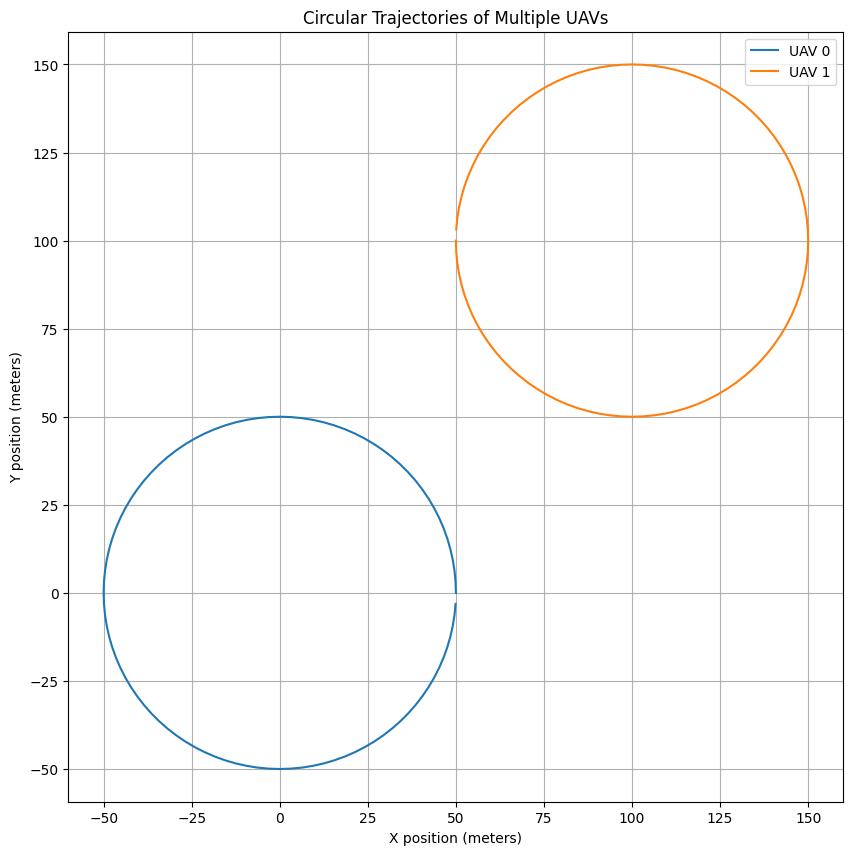

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Constants
N = 100  # Number of time slots
M = 2    # Number of UAVs
H = 100  # Altitude at which all UAVs fly
radius = 50  # Radius of the circular trajectory
omega = 2 * np.pi / N  # Angular velocity (assuming one full circle over the time horizon)

# Initial positions and initial angles for M UAVs
initial_angles = np.linspace(0, 2 * np.pi, M, endpoint=False)
circle_centers = np.array([[100 * m, 100 * m] for m in range(M)])  # Just an example

# Initialize trajectories for M UAVs over N time slots
trajectories = np.zeros((M, N, 3))

# Calculate the circular trajectory for each UAV
for m in range(M):
    for n in range(N):
        angle = initial_angles[m] + omega * n  # Current angle at time slot n
        trajectories[m, n, 0] = circle_centers[m, 0] + radius * np.cos(angle)  # x-coordinate
        trajectories[m, n, 1] = circle_centers[m, 1] + radius * np.sin(angle)  # y-coordinate
        trajectories[m, n, 2] = H  # Altitude is constant

# Check the trajectories for the first UAV
print("Trajectory for UAV 0:")
print(trajectories[0])

plt.figure(figsize=(10, 10))
for m in range(M):
    # Extract the x and y coordinates for the m-th UAV
    x_coords = trajectories[m, :, 0]
    y_coords = trajectories[m, :, 1]
    plt.plot(x_coords, y_coords, label=f'UAV {m}')
plt.xlabel('X position (meters)')
plt.ylabel('Y position (meters)')
plt.title('Circular Trajectories of Multiple UAVs')
plt.legend()
plt.grid(True)
plt.axis('equal')  # Ensuring the x and y axes have the same scale
plt.show()




UAV-Vehicles Connectivity Model


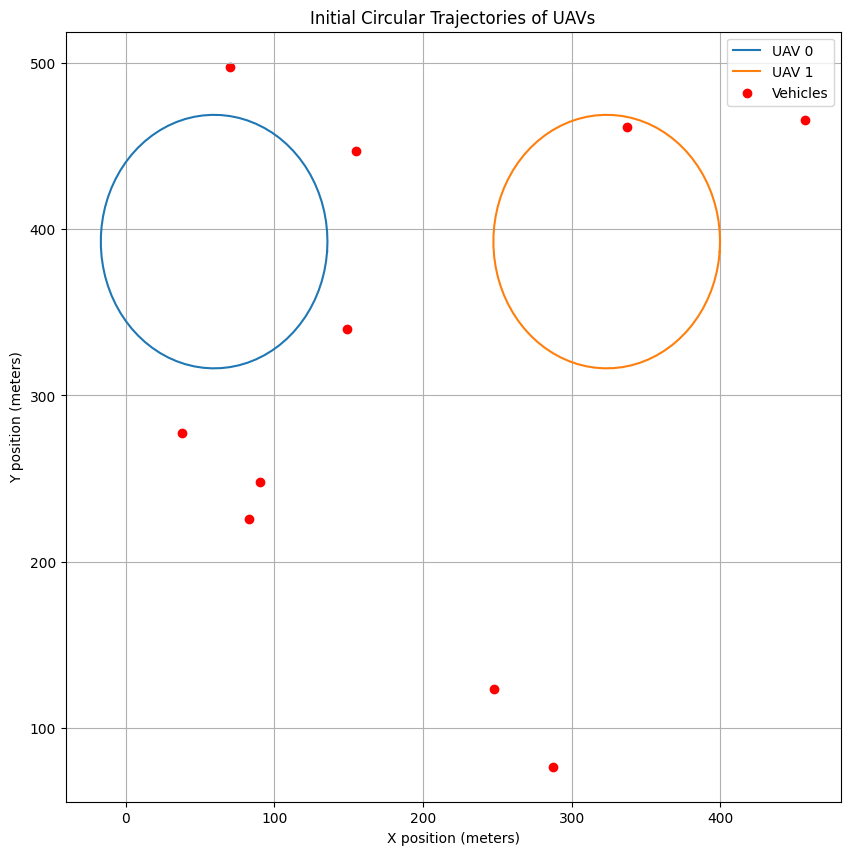

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters based on the provided details
K = 10  # Number of IoT nodes
M = 2  # Number of UAVs
T = 40  # Flight time in seconds
delta_t = 0.5  # Length of time slot in seconds
N = int(T / delta_t)  # Number of time slots
H = 100  # Fixed altitude for UAVs
d_min = 10  # Minimum collision protection distance in meters
P_max = 1  # Maximum communication power in Watts

# Random distribution of IoT nodes in a 1000m x 1000m region
iot_nodes = np.random.rand(K, 2) * 500
G_c = np.mean(iot_nodes, axis=0)  # Geometric center of all IoT nodes
r_c = max(np.linalg.norm(iot_nodes - G_c, axis=1)) / 2  # Reference radius

# UAV initial positions and velocities
positions = np.zeros((M, N, 2))  # Placeholder for UAV positions
velocities = np.zeros((M, N, 2))  # Placeholder for UAV velocities

# Initialize UAV positions and velocities based on a circular trajectory
for m in range(M):
    # Calculate the center of the circle for UAV m
    if m == 0:
        center = (G_c[0] - r_c * np.sin(np.pi / 3), G_c[1] + r_c * np.sin(np.pi / 6))
    elif m == 1:
        center = (G_c[0] + r_c * np.sin(np.pi / 3), G_c[1] + r_c * np.sin(np.pi / 6))
    else:  # m == 2
        center = (G_c[0], G_c[1] - r_c)

    # Initial trajectory and velocity
    for n in range(N):
        angle = 2 * np.pi * (n - 1) / (N - 1)
        positions[m, n] = center + r_c / 2 * np.array([np.cos(angle), np.sin(angle)])
        velocities[m, n] = (2 * np.pi * r_c / 2 / T) * np.array([np.cos(angle), np.sin(angle)])

# Plot initial UAV trajectories
plt.figure(figsize=(10, 10))
for m in range(M):
    plt.plot(positions[m, :, 0], positions[m, :, 1], label=f'UAV {m}')
plt.scatter(iot_nodes[:, 0], iot_nodes[:, 1], c='red', label='Vehicles')
plt.xlabel('X position (meters)')
plt.ylabel('Y position (meters)')
plt.title('Initial Circular Trajectories of UAVs')
plt.legend()
plt.grid(True)
plt.show()

# Placeholder for optimization loop
for i in range(N):
    # Optimization would occur here, updating positions and velocities based on the algorithm
    pass

# After optimization, visualize the final trajectories (placeholder)
# ...


Omega matrix:
[[[1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0.]
  [0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1.]]

 [[1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
  [0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]

 [[1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1.]
  [0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0.]]

 [[1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1.]
  [0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0.]]

 [[0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0.]
  [1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]]]


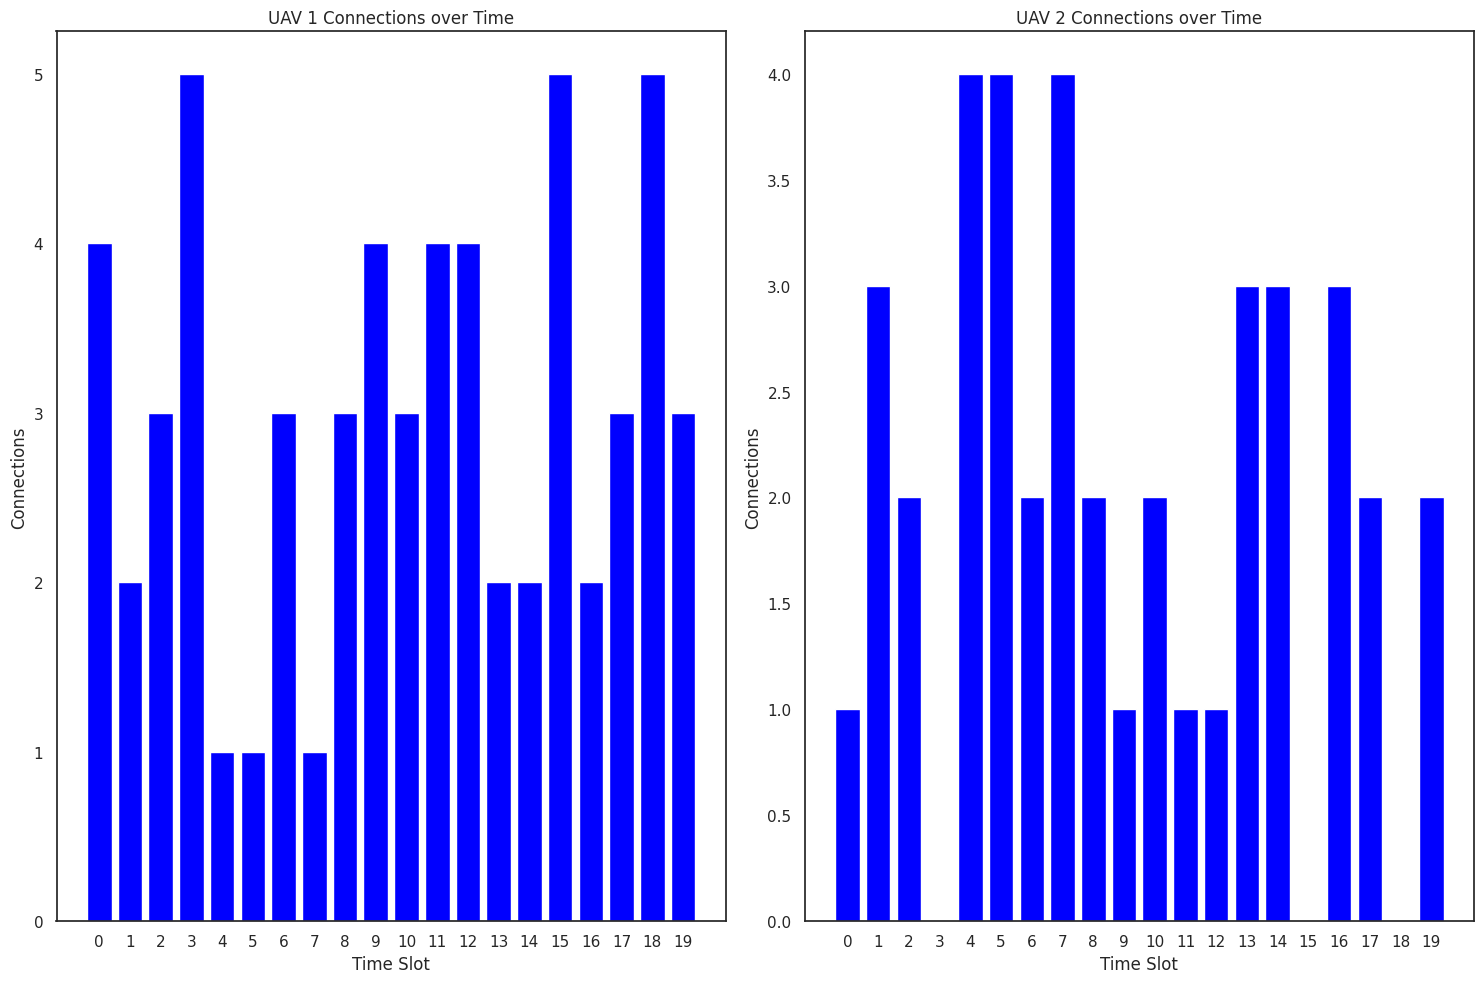

In [ ]:
import numpy as np

def initialize_omega(V, U, N):
    """
    Initializes the omega matrix with the constraint that each vehicle v is associated
    with exactly one UAV u in each time slot n.

    :param V: Number of vehicles.
    :param U: Number of UAVs.
    :param N: Number of time slots.
    :return: A 3D numpy array representing omega[v][u][n].
    """
    # Initialize omega with zeros
    omega = np.zeros((V, U, N))

    # Enforce the constraint for each vehicle and time slot
    for v in range(V):
        for n in range(N):
            # Randomly select a UAV for each vehicle and time slot
            u_selected = np.random.randint(U)
            omega[v][u_selected][n] = 1

    return omega

# Example usage
V = 5  # Example number of vehicles
U = 2   # Example number of UAVs
N = 20   # Example number of time slots

omega = initialize_omega(V, U, N)

# Print the initialized omega matrix
print("Omega matrix:")
print(omega)
# Initialize a figure
plt.figure(figsize=(15, 10))

# We'll create subplots for each UAV
for u in range(U):
    # Sum connections for UAV u across all vehicles for each time slot
    connections_per_time_slot = np.sum(omega[:, u, :], axis=0)  # Sum across vehicles

    # Create a subplot for each UAV
    ax = plt.subplot(1, U, u+1)

    # Generate a bar chart for each time slot
    ax.bar(np.arange(N), connections_per_time_slot, color='blue')

    ax.set_xlabel('Time Slot')
    ax.set_ylabel('Connections')
    ax.set_title(f'UAV {u+1} Connections over Time')
    ax.set_xticks(np.arange(N))  # Set x-tick labels to match time slot indices

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


Subchannel Assignment

In [ ]:
pip install pulp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 41.7 MB/s eta 0:00:00


In [ ]:
import pulp

# Define the number of vehicles, subchannels, and time slots
V = 5  # Number of vehicles
K = 10 # Number of subchannels
N = 50  # Number of time slots

# Create the linear programming problem
problem = pulp.LpProblem("SubchannelAllocation", pulp.LpMinimize)

# Decision variables
alpha = pulp.LpVariable.dicts("alpha", ((v, k, n) for v in range(V) for k in range(K) for n in range(N)),
                              cat='Binary')

# Objective function (can be adjusted as needed)
problem += 0, "Objective"

# Constraint: Each vehicle must be assigned at least one subchannel at all times
for v in range(V):
    for n in range(N):
        problem += pulp.lpSum(alpha[v, k, n] for k in range(K)) >= 1

# Constraint: A subchannel cannot be assigned to more than one vehicle at the same time
for k in range(K):
    for n in range(N):
        problem += pulp.lpSum(alpha[v, k, n] for v in range(V)) <= 1

# Solve the problem
problem.solve()

# Check if a feasible solution was found
if pulp.LpStatus[problem.status] == 'Optimal':
    print("Subchannel allocation:")
    for v in range(V):
        for k in range(K):
            for n in range(N):
                if pulp.value(alpha[v, k, n]) == 1:
                    print(f"Time {n}, Vehicle {v} -> Subchannel {k}")
else:
    print("No feasible solution found.")






Subchannel allocation:
Time 0, Vehicle 0 -> Subchannel 0
Time 4, Vehicle 0 -> Subchannel 0
Time 7, Vehicle 0 -> Subchannel 0
Time 10, Vehicle 0 -> Subchannel 0
Time 12, Vehicle 0 -> Subchannel 0
Time 13, Vehicle 0 -> Subchannel 0
Time 15, Vehicle 0 -> Subchannel 0
Time 16, Vehicle 0 -> Subchannel 0
Time 19, Vehicle 0 -> Subchannel 0
Time 23, Vehicle 0 -> Subchannel 0
Time 25, Vehicle 0 -> Subchannel 0
Time 29, Vehicle 0 -> Subchannel 0
Time 30, Vehicle 0 -> Subchannel 0
Time 31, Vehicle 0 -> Subchannel 0
Time 32, Vehicle 0 -> Subchannel 0
Time 36, Vehicle 0 -> Subchannel 0
Time 39, Vehicle 0 -> Subchannel 0
Time 40, Vehicle 0 -> Subchannel 0
Time 41, Vehicle 0 -> Subchannel 0
Time 42, Vehicle 0 -> Subchannel 0
Time 43, Vehicle 0 -> Subchannel 0
Time 44, Vehicle 0 -> Subchannel 0
Time 47, Vehicle 0 -> Subchannel 0
Time 1, Vehicle 0 -> Subchannel 1
Time 6, Vehicle 0 -> Subchannel 1
Time 34, Vehicle 0 -> Subchannel 1
Time 37, Vehicle 0 -> Subchannel 1
Time 48, Vehicle 0 -> Subchannel 1
Ti

In [ ]:
pip install pandas

In [ ]:
import pulp
import pandas as pd

# Define parameters
U = 2   # Number of UAVs
V = 3   # Number of vehicles
K = 5   # Number of subchannels
N = 2   # Number of time slots

# Create a new linear programming problem
problem = pulp.LpProblem("SubchannelAllocation", pulp.LpMinimize)

# Decision variables
omega = pulp.LpVariable.dicts("omega", ((u, v, n) for u in range(U) for v in range(V) for n in range(N)), cat='Binary')
alpha = pulp.LpVariable.dicts("alpha", ((v, k, n) for v in range(V) for k in range(K) for n in range(N)), cat='Binary')

# Objective function - can be adjusted to reflect specific goals
problem += pulp.lpSum(alpha[v, k, n] for v in range(V) for k in range(K) for n in range(N))

# Constraints
# Add other necessary constraints as per your system's requirements

# Constraint: A subchannel cannot be assigned to more than one vehicle at the same time
for k in range(K):
    for n in range(N):
        problem += pulp.lpSum(alpha[v, k, n] for v in range(V)) <= 1

# Constraint: A vehicle must have a different subchannel in the next time slot
for v in range(V):
    for k in range(K):
        for n in range(N-1):
            problem += alpha[v, k, n] + alpha[v, k, n+1] <= 1

# Solve the problem
problem.solve()

# Check the status
print("Status:", pulp.LpStatus[problem.status])

# Prepare the data for the table
data = []
if pulp.LpStatus[problem.status] == 'Optimal':
    for n in range(N):
        for v in range(V):
            for k in range(K):
                if pulp.value(alpha[v, k, n]) == 1:
                    connected_uav = next((u for u in range(U) if pulp.value(omega[u, v, n]) == 1), None)
                    data.append({'Time Slot': n, 'Vehicle': v, 'Subchannel': k, 'Connected UAV': connected_uav})
    df = pd.DataFrame(data)
    print(df)
else:
    print("No feasible solution found.")


Status: Optimal
Empty DataFrame
Columns: []
Index: []


In [ ]:
import pulp
import pandas as pd

# Define parameters
U = 2   # Number of UAVs
V = 5   # Number of vehicles
K = 10   # Number of subchannels
N = 50   # Number of time slots

# Create a new linear programming problem
problem = pulp.LpProblem("SubchannelAllocation", pulp.LpMinimize)

# Decision variables
omega = pulp.LpVariable.dicts("omega", ((u, v, n) for u in range(U) for v in range(V) for n in range(N)), cat='Binary')
alpha = pulp.LpVariable.dicts("alpha", ((v, k, n) for v in range(V) for k in range(K) for n in range(N)), cat='Binary')

# Objective function - can be adjusted to reflect specific goals
problem += pulp.lpSum(alpha[v, k, n] for v in range(V) for k in range(K) for n in range(N))

# Constraints

# Constraint: Each UAV must connect to at least one vehicle
for u in range(U):
    for n in range(N):
        problem += pulp.lpSum(omega[u, v, n] for v in range(V)) >= 1

# Constraint: Each vehicle is connected to at most one UAV at a time
for v in range(V):
    for n in range(N):
        problem += pulp.lpSum(omega[u, v, n] for u in range(U)) <= 1

# Constraint: A subchannel can be assigned to a vehicle only if it is connected to a UAV
for v in range(V):
    for k in range(K):
        for n in range(N):
            problem += alpha[v, k, n] <= pulp.lpSum(omega[u, v, n] for u in range(U))

# Constraint: Each vehicle must be assigned at least one subchannel at all times
for v in range(V):
    for n in range(N):
        problem += pulp.lpSum(alpha[v, k, n] for k in range(K)) >= 1

# Constraint: A subchannel cannot be assigned to more than one vehicle at the same time
for k in range(K):
    for n in range(N):
        problem += pulp.lpSum(alpha[v, k, n] for v in range(V)) <= 1

# Constraint: A vehicle must have a different subchannel in the next time slot
for v in range(V):
    for k in range(K):
        for n in range(N-1):
            problem += alpha[v, k, n] + alpha[v, k, n+1] <= 1

# Solve the problem
problem.solve()

# Check the status
print("Status:", pulp.LpStatus[problem.status])

# Prepare the data for the table
data = []
if pulp.LpStatus[problem.status] == 'Optimal':
    for n in range(N):
        for v in range(V):
            for k in range(K):
                if pulp.value(alpha[v, k, n]) == 1:
                    connected_uav = next((u for u in range(U) if pulp.value(omega[u, v, n]) == 1), None)
                    data.append({'Time Slot': n, 'Vehicle': v, 'Subchannel': k, 'Connected UAV': connected_uav})
    df = pd.DataFrame(data)
    print(df)
else:
    print("No feasible solution found.")


Status: Optimal
     Time Slot  Vehicle  Subchannel  Connected UAV
0            0        0           4              0
1            0        1           2              0
2            0        2           1              0
3            0        3           3              0
4            0        4           9              1
..         ...      ...         ...            ...
245         49        0           5              1
246         49        1           0              0
247         49        2           2              0
248         49        3           3              0
249         49        4           8              0

[250 rows x 4 columns]


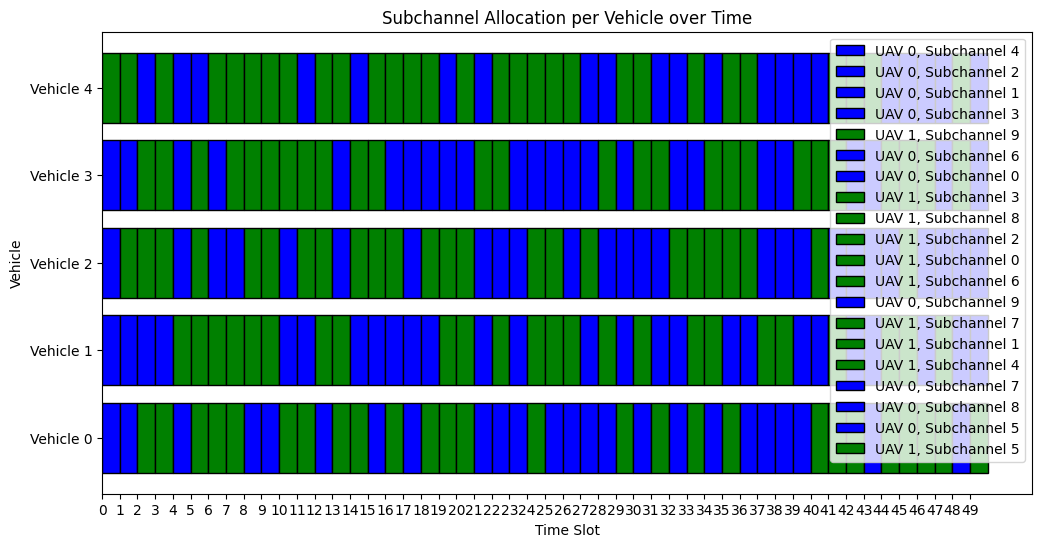

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Sample data from the output

df = pd.DataFrame(data)

# Define a color map for UAVs
uav_colors = {0: 'blue', 1: 'green', None: 'grey'}

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Iterate over time slots
for n in df['Time Slot'].unique():
    # Filter DataFrame for the current time slot
    df_n = df[df['Time Slot'] == n]

    # Iterate over vehicles
    for v in df_n['Vehicle'].unique():
        # Filter DataFrame for the current vehicle
        df_nv = df_n[df_n['Vehicle'] == v]

        # Iterate over subchannel allocations for this vehicle
        for index, row in df_nv.iterrows():
            # Plot a bar for each subchannel assignment
            ax.barh(y=v, width=1, left=n, color=uav_colors[row['Connected UAV']], edgecolor='black', label=f'UAV {row["Connected UAV"]}, Subchannel {row["Subchannel"]}')

# Set labels and title
ax.set_xlabel('Time Slot')
ax.set_ylabel('Vehicle')
ax.set_title('Subchannel Allocation per Vehicle over Time')
ax.set_yticks(np.arange(df['Vehicle'].max() + 1))
ax.set_xticks(np.arange(df['Time Slot'].max() + 1))
ax.set_yticklabels([f'Vehicle {v}' for v in range(df['Vehicle'].max() + 1)])
ax.set_xticklabels([f'{n}' for n in range(df['Time Slot'].max() + 1)])

# Create legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

plt.show()


In [ ]:
import numpy as np
from scipy.optimize import minimize

# Define parameters
U = 3  # Number of UAVs
N = 10  # Number of time slots
d_min = 50  # Minimum distance (meters)
delta_t = 1  # Time step (seconds)

# Define initial positions, speeds, and accelerations for UAVs
q_init = np.random.rand(U, 2) * 100
S_init = np.zeros((U, 2))
phi_init = np.zeros((U, 2))

# Define the objective function (hypothetical)
def objective(x):
    return np.sum(np.square(x))  # Example: Minimize the sum of squares of the variables

# Define constraint functions (hypothetical examples)
def constraint_return_to_original_position(x):
    # Placeholder logic for returning to the original position
    return np.linalg.norm(x[:2] - q_init[0])  # Example for the first UAV

def constraint_minimum_distance(x):
    # Placeholder logic for minimum distance
    return np.linalg.norm(x[:2] - x[2:4]) - d_min  # Example distance between first two UAVs

def constraint_kinematics(x):
    # Placeholder logic for kinematic constraints
    return x[4] - (x[0] + S_init[0, 0]*delta_t + 0.5*phi_init[0, 0]*delta_t**2)  # Example for the first UAV

# Combine constraints
constraints = [{'type': 'eq', 'fun': constraint_return_to_original_position},
               {'type': 'ineq', 'fun': constraint_minimum_distance},
               {'type': 'eq', 'fun': constraint_kinematics}]

# Initial guess
x0 = np.random.rand(U * N * 2)  # Example initialization

# Perform optimization
result = minimize(objective, x0, constraints=constraints, method='SLSQP')

# Process result
print("Optimization result:", result)



Optimization result:  message: Iteration limit reached
 success: False
  status: 9
     fun: 8763.971535780816
       x: [ 1.080e+01  9.236e+01 ... -3.900e-06  1.464e-05]
     nit: 100
     jac: [ 2.159e+01  1.847e+02 ...  0.000e+00  0.000e+00]
    nfev: 6188
    njev: 100
